# Segundo Parcial
Apellidos y Nombres: Torres Loayza Alberto Antonio
Carrera: Ingeniería de Sistemas

## 1. Aprendizaje No Supervisado
Se aplicará el algoritmo K-means clustering para aprendizaje no supervisado a un dataset sobre detección de enfermedades cardiovasculares.

### 1.1 Preprocesamiento del Dataset
El preprocesamiento del dataset implica la lectura del mismo por medio de pandas, la eliminación de columnas irrelevantes como "id", la simulación para aprendizaje no supervisado y la normalización de los valores.

In [2]:
import pandas as pd
import numpy as np

data = pd.read_excel("cardio_train.xlsx")
data

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,988,22469,1,155,69.0,130,80,2,2,0,0,1,0
1,989,14648,1,163,71.0,110,70,1,1,0,0,1,1
2,990,21901,1,165,70.0,120,80,1,1,0,0,1,0
3,991,14549,2,165,85.0,120,80,1,1,1,1,1,0
4,992,23393,1,155,62.0,120,80,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69296,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69297,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69298,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69299,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


Observamos que el dataset tiene m = 69301 ejemplos y n = 13 características, sin embargo, la columna "id" no es relevante para el objetivo del modelo por lo que la eliminamos, así mismo, eliminamos la etiqueta o columna objetivo "cardio" para simular un dataset que no tiene etiquetas para aprendizaje no supervisado, quedando n = 11 características que serían:
1.	Edad | Característica objetivo | Edad | int (días)
2.	Género | Característica objetivo | Género | 1: mujer, 2: hombre |
3.	Altura | Característica objetivo | Altura | int (cm) |
4.	Peso | Característica objetivo | Peso | flotador (kg) |
5.	Presión arterial sistólica | Función de examen | ap_hi | int |
6.	Presión arterial diastólica | Función de examen | ap_lo | int |
7.	Colesterol | Función de examen | Colesterol | 1: normal, 2: por encima de lo normal, 3: muy por encima de lo normal |
8.	Glucosa | Función de examen | gluc | 1: normal, 2: por encima de lo normal, 3: muy por encima de lo normal |
9.	Fumar | Característica subjetiva | Humo | 0: no fuma, 1: fuma |
10.	Ingesta de alcohol | Característica subjetiva | ALCO | 0: no consume alcohol, 1: consume alcohol |
11.	Actividad física | Característica subjetiva | Activo | 0: no es activo, 1: activo |

Y guardamos las etiquetas de "cardio" en la variable "y" para hacer un posterior análisis.

In [12]:
X = data.copy()
X.drop(columns = ['id','cardio'], inplace=True)
X

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
0,22469,1,155,69.0,130,80,2,2,0,0,1
1,14648,1,163,71.0,110,70,1,1,0,0,1
2,21901,1,165,70.0,120,80,1,1,0,0,1
3,14549,2,165,85.0,120,80,1,1,1,1,1
4,23393,1,155,62.0,120,80,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
69296,19240,2,168,76.0,120,80,1,1,1,0,1
69297,22601,1,158,126.0,140,90,2,2,0,0,1
69298,19066,2,183,105.0,180,90,3,1,0,1,0
69299,22431,1,163,72.0,135,80,1,2,0,0,0


In [13]:
y = data['cardio'].copy()
y

0        0
1        1
2        0
3        0
4        0
        ..
69296    0
69297    1
69298    1
69299    1
69300    0
Name: cardio, Length: 69301, dtype: int64

Normalizamos los datos de X con StandarScaler de Scikit Learn para trabajar con el algoritmo K-means posteriormente.

In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[ 1.21601824, -0.73302344, -1.14099939, ..., -0.31072844,
        -0.23864069,  0.49376463],
       [-1.95391548, -0.73302344, -0.16601717, ..., -0.31072844,
        -0.23864069,  0.49376463],
       [ 0.98580185, -0.73302344,  0.07772839, ..., -0.31072844,
        -0.23864069,  0.49376463],
       ...,
       [-0.16325352,  1.36421285,  2.27143838, ..., -0.31072844,
         4.19040018, -2.02525646],
       [ 1.20061644, -0.73302344, -0.16601717, ..., -0.31072844,
        -0.23864069, -2.02525646],
       [ 0.43417421, -0.73302344,  0.68709227, ..., -0.31072844,
        -0.23864069,  0.49376463]], shape=(69301, 11))

### 1.2 Aplicación de algoritmo K-means clustering

Importamos Kmeans y definimos número de clústeres igual a 2 (k = 2) porque sabemos de antemano que nuestra intención es detectar si un paciente padece de una enfermedad cardiovascular (1) o si no padece (0).

In [16]:
from sklearn.cluster import KMeans
k = 2
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(X_scaled)
y_pred

array([1, 0, 0, ..., 1, 0, 0], shape=(69301,), dtype=int32)

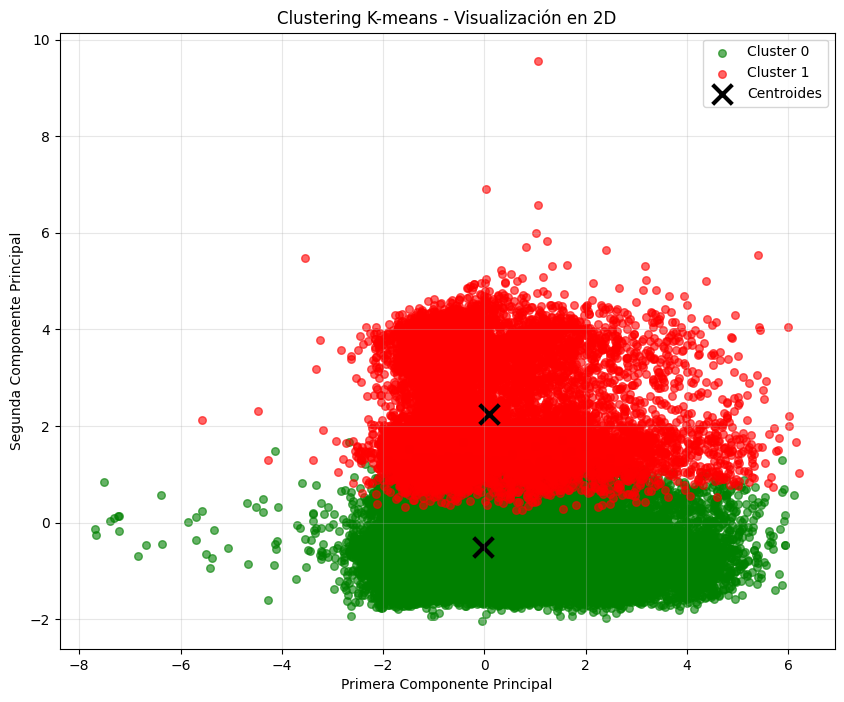

In [36]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

centroids_pca = pca.transform(kmeans.cluster_centers_)

plt.figure(figsize=(10, 8))

colors = ['green', 'red']
for i in range(2):
    mask = y_pred == i
    plt.scatter(X_pca[mask, 0], X_pca[mask, 1], 
                c=colors[i], 
                label=f'Cluster {i}', 
                alpha=0.6, 
                s=30)

plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], 
            c='black', marker='x', s=200, linewidths=3,
            label='Centroides')

plt.xlabel('Primera Componente Principal')
plt.ylabel('Segunda Componente Principal')
plt.title('Clustering K-means - Visualización en 2D')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

Dados nuevos ejemplos podemos asignar un grupo a cada una de estas muestras (hard clustering) aplicando K-means a estos nuevos datos y prediciendo a qué cluster pertenecerán.

In [34]:
X_new = np.array([[10500, 1, 165, 65, 120, 80, 1, 1, 1, 1, 1], 
                  [19890, 1, 168, 84, 130, 70, 2, 3, 1, 0, 1], 
                  [25135, 1, 159, 51, 130, 100, 1, 1, 0, 0, 0], 
                  [18030, 2, 181, 98, 120, 100, 3, 3, 1, 1, 0]])
X_new_scaled = scaler.fit_transform(X_new)
kmeans.predict(X_new_scaled)

array([0, 1, 0, 1], dtype=int32)

### 1.3 Comparación de las etiquetas obtenidas por K-means con las reales

Graficamos los datos con las etiquetas reales y comparamos las graficas.

In [38]:
df = data.copy()
df.drop(columns = 'id', inplace=True)
df

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,22469,1,155,69.0,130,80,2,2,0,0,1,0
1,14648,1,163,71.0,110,70,1,1,0,0,1,1
2,21901,1,165,70.0,120,80,1,1,0,0,1,0
3,14549,2,165,85.0,120,80,1,1,1,1,1,0
4,23393,1,155,62.0,120,80,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
69296,19240,2,168,76.0,120,80,1,1,1,0,1,0
69297,22601,1,158,126.0,140,90,2,2,0,0,1,1
69298,19066,2,183,105.0,180,90,3,1,0,1,0,1
69299,22431,1,163,72.0,135,80,1,2,0,0,0,1
